# More Pandas

In [6]:
import numpy as np
import pandas as pd
import requests
from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


![panda](http://res.freestockphotos.biz/thumbs/3/3173-illustration-of-a-giant-panda-eating-bamboo-th.png)

## Scenario

You have decided that you want to start your own animal shelter, but you want to get an idea of what that will entail and to get more information about planning. In this lecture, we'll look at a real data set collected by Austin Animal Center.  The code below will return the last 1000 animal outcomes that have occurred.  We will use our pandas skills from the last lecture and learn some new ones in order to explore these data further.



## Agenda

SWBAT:

- Apply and use `.map()`, `apply()`, and `.applymap()` from the `pandas` library
- Apply and use `.where()` and `.select()` from the `numpy` library
- Use lambda functions in coordination with the above functions
- Explain what a groupby object is and split a DataFrame using `.groupby()`

## Getting started: Exploratory Data Analysis (EDA)

Let's take a moment to download and to examine the [Austin Animal Center data set](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238/data). 

Let's take a look at the data:

In [3]:
url = 'https://data.austintexas.gov/resource/9t4d-g238.json'
response = requests.get(url)
animals = pd.DataFrame(response.json())
animals.head()

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,outcome_subtype
0,A821019,Spot,2020-12-08T12:37:00.000,2020-12-08T12:37:00.000,2017-04-03T00:00:00.000,Adoption,Dog,Neutered Male,3 years,Pit Bull,White/Black,NaN
1,A824438,*Rose,2020-12-08T12:27:00.000,2020-12-08T12:27:00.000,2011-11-27T00:00:00.000,Adoption,Dog,Spayed Female,9 years,German Shepherd,Tan/Black,NaN
2,A825587,*Ludwig,2020-12-08T12:22:00.000,2020-12-08T12:22:00.000,2011-11-06T00:00:00.000,Adoption,Cat,Neutered Male,9 years,Domestic Medium Hair,Cream Tabby,Foster
3,A819626,NaN,2020-12-08T11:53:00.000,2020-12-08T11:53:00.000,2020-06-25T00:00:00.000,Adoption,Cat,Neutered Male,5 months,Domestic Shorthair,White/Black,Foster
4,A819624,NaN,2020-12-08T11:52:00.000,2020-12-08T11:52:00.000,2020-06-25T00:00:00.000,Adoption,Cat,Neutered Male,5 months,Domestic Shorthair,Black,Foster


In [4]:
animals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   animal_id         1000 non-null   object
 1   name              655 non-null    object
 2   datetime          1000 non-null   object
 3   monthyear         1000 non-null   object
 4   date_of_birth     1000 non-null   object
 5   outcome_type      900 non-null    object
 6   animal_type       1000 non-null   object
 7   sex_upon_outcome  1000 non-null   object
 8   age_upon_outcome  1000 non-null   object
 9   breed             1000 non-null   object
 10  color             1000 non-null   object
 11  outcome_subtype   482 non-null    object
dtypes: object(12)
memory usage: 93.9+ KB


One way to become familiar with your data is to start asking questions. In your EDA notebooks, **markdown** will be especially helpful in tracking these questions and your methods of answering the questions.  

For example, a simple first question we might ask, after being presented with the above dataset, would be:

### What is the most commonly adopted animal type in the dataset?

We can then begin thinking about what parts of the DataFrame we need to answer the question.

    What features do we need?
     - "animal_type"
    What type of logic and calculation do we perform?
     - Let's use `.value_counts()` to count the different animal types
    What type of visualization would help us answer the question?
     - A bar chart would be good for this purpose

In [5]:
animals['animal_type'].value_counts()

Dog          570
Cat          370
Other         46
Livestock      7
Bird           7
Name: animal_type, dtype: int64

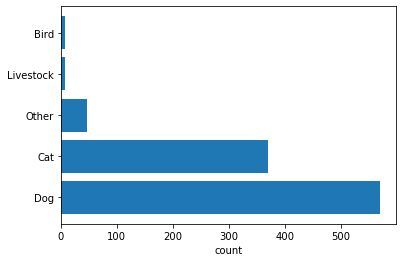

In [11]:
fig, ax = plt.subplots()

ax.barh(animals['animal_type'].value_counts().index,
        width=animals['animal_type'].value_counts())
ax.set_xlabel('count');

Questions lead to other questions. For the above example, the visualization raises the question, what "Other" animals are being adopted?

To find out, we need to know where the type of animal for "Other" is encoded.   
    
    What features do we need to answer what the most commonly adopted type of animal within the Other category is?

In [12]:
animals[animals['animal_type'] == 'Other']['breed'].value_counts()

Bat             22
Guinea Pig       5
Raccoon          5
Fox              4
Rabbit Sh        3
Opossum          2
Skunk            1
Snake/Python     1
Hedgehog         1
Turtle           1
Squirrel         1
Name: breed, dtype: int64

### Quick Exploration

Here are some good EDA steps *whatever* your dataset:

In [13]:
# Use info to check nulls, datatypes, and shape

animals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   animal_id         1000 non-null   object
 1   name              655 non-null    object
 2   datetime          1000 non-null   object
 3   monthyear         1000 non-null   object
 4   date_of_birth     1000 non-null   object
 5   outcome_type      900 non-null    object
 6   animal_type       1000 non-null   object
 7   sex_upon_outcome  1000 non-null   object
 8   age_upon_outcome  1000 non-null   object
 9   breed             1000 non-null   object
 10  color             1000 non-null   object
 11  outcome_subtype   482 non-null    object
dtypes: object(12)
memory usage: 93.9+ KB


In [14]:
# Use describe to gain a bit more detail about certain features.

animals.describe()

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,outcome_subtype
count,1000,655,1000,1000,1000,900,1000,1000,1000,1000,1000,482
unique,979,562,816,816,490,8,5,6,34,176,100,13
top,A820540,Luna,2020-12-04T11:07:00.000,2020-12-04T11:07:00.000,2020-08-21T00:00:00.000,Adoption,Dog,Neutered Male,2 years,Domestic Shorthair,Black/White,Partner
freq,3,6,6,6,19,484,570,352,197,227,105,214


In [15]:
# Use value counts to check a categorical feature's distribution

animals['outcome_type'].value_counts()

Adoption           484
Transfer           227
Return to Owner    105
Euthanasia          60
Disposal             9
Died                 7
Rto-Adopt            7
Missing              1
Name: outcome_type, dtype: int64

## `pandas`'s `.apply()`, `Series.map()`, and `df.applymap()` vs. `numpy`'s <br/> <br/> 
`.where()` and `.select()`

These are `pandas`-native methods for applying transformations to columns.

### `.applymap()`

`.applymap()` is used to effect changes in *all* the values of a DataFrame.

In [16]:
# This line will apply the base `type()` function to 
# all entries of the DataFrame.

animals.applymap(type)

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,outcome_subtype
0,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'float'>
1,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'float'>
2,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
3,<class 'str'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
4,<class 'str'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
...,...,...,...,...,...,...,...,...,...,...,...,...
995,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
996,<class 'str'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
997,<class 'str'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
998,<class 'str'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>


### `Series.map()` and `.apply()`

The `.map()` method takes a function as input that it will then apply to every entry in the Series. The `.apply()` method is similar.

In [27]:
animals['age_upon_outcome'].value_counts()

2 years      197
2 months     151
1 year       115
NULL          97
3 months      73
3 years       45
1 month       35
4 months      34
6 months      28
3 weeks       24
5 months      21
5 years       20
4 years       19
8 months      17
10 years      16
10 months     15
7 years       15
6 years       13
7 months      11
8 years       11
2 weeks        8
9 months       5
9 years        4
3 days         4
15 years       4
12 years       3
11 months      3
17 years       3
5 weeks        2
11 years       2
4 weeks        2
0 years        1
13 years       1
16 years       1
Name: age_upon_outcome, dtype: int64

In [49]:
def young(age):
    if age == '3 days':
        return 'less than 1 week'
    else:
        return age

In [50]:
animals['new_age1'] = animals['age_upon_outcome'].map(young)
animals['new_age1']

0       3 years
1       9 years
2       9 years
3      5 months
4      5 months
         ...   
995     7 years
996    2 months
997    4 months
998     3 years
999     1 month
Name: new_age1, Length: 1000, dtype: object

### Slower Than `numpy`

In general, `np.where()` and `np.select()` are faster:

In [52]:
animals['new_age2'] = np.where(animals['age_upon_outcome'] == '3 days',
                              'less than 1 week', animals['age_upon_outcome'])
animals['new_age2']

0       3 years
1       9 years
2       9 years
3      5 months
4      5 months
         ...   
995     7 years
996    2 months
997    4 months
998     3 years
999     1 month
Name: new_age2, Length: 1000, dtype: object

In [54]:
(animals['new_age1'] != animals['new_age2']).sum()

0

In [55]:
%timeit animals['new_age1'] = animals['age_upon_outcome'].map(young)

369 µs ± 28.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [58]:
%timeit animals['new_age2'] = np.where(animals['age_upon_outcome'] == '3 days',\
                                'less than 1 week', animals['age_upon_outcome'])

242 µs ± 9.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### More Sophisticated Mapping

Let's use `.map()` to turn sex_upon_outcome into a ternary category: male, female, or unknown. 

First, explore the unique values:

In [59]:
animals['sex_upon_outcome'].unique()

array(['Unknown'], dtype=object)

In [60]:
def sex_mapper(status):
    if status in ['Neutered Male', 'Intact Male']:
        return 'Male'
    elif status in ['Spayed Female', 'Intact Female']:
        return 'Female'
    else:
        return 'Unknown'

In [63]:
animals['new_sex1'] = animals['sex_upon_outcome'].map(sex_mapper)
animals['new_sex1']

0      Unknown
1      Unknown
2      Unknown
3      Unknown
4      Unknown
        ...   
995    Unknown
996    Unknown
997    Unknown
998    Unknown
999    Unknown
Name: new_sex1, Length: 1000, dtype: object

Again, `numpy` will be faster:

In [62]:
conditions = [animals['sex_upon_outcome'] == 'Neutered Male',
             animals['sex_upon_outcome'] == 'Intact Male',
             animals['sex_upon_outcome'] == 'Spayed Female',
             animals['sex_upon_outcome'] == 'Intact Female',
             animals['sex_upon_outcome'] == 'Unknown',
             animals['sex_upon_outcome'] == 'NULL']

choices = ['Male', 'Male', 'Female', 'Female', 'Unknown', 'Unknown']

In [64]:
animals['new_sex2'] = np.select(conditions, choices)
animals['new_sex2']

0      Unknown
1      Unknown
2      Unknown
3      Unknown
4      Unknown
        ...   
995    Unknown
996    Unknown
997    Unknown
998    Unknown
999    Unknown
Name: new_sex2, Length: 1000, dtype: object

In [65]:
(animals['new_sex1'] != animals['new_sex2']).sum()

0

In [66]:
%timeit animals['new_sex1'] = animals['sex_upon_outcome'].map(sex_mapper)

389 µs ± 14.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [67]:
%timeit animals['new_sex2'] = np.select(conditions, choices)

192 µs ± 4.48 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Anonymous Functions (Lambda Abstraction)

Simple functions can be defined right in the function call. This is called 'lambda abstraction'; the function thus defined has no name and hence is "anonymous".

Let's use a lambda function to get rid of 'Other' in the "animal_type' column.

In [90]:
animals[animals['animal_type'] == 'Other']

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,outcome_subtype,new_age,new_age1,new_age2,new_sex1,new_sex2
18,A826848,NaN,2020-12-08T10:01:00.000,2020-12-08T10:01:00.000,2018-12-07T00:00:00.000,Euthanasia,Other,Unknown,2 years,Bat,Brown,Rabies Risk,2 years,2 years,2 years,Unknown,Unknown
23,A826669,NaN,2020-12-07T18:13:00.000,2020-12-07T18:13:00.000,2019-12-03T00:00:00.000,Euthanasia,Other,Unknown,1 year,Bat,Brown,Rabies Risk,1 year,1 year,1 year,Unknown,Unknown
39,A826659,NaN,2020-12-07T15:40:00.000,2020-12-07T15:40:00.000,2019-12-03T00:00:00.000,Euthanasia,Other,Unknown,1 year,Bat,Black,Rabies Risk,1 year,1 year,1 year,Unknown,Unknown
75,A826601,NaN,2020-12-06T11:22:00.000,2020-12-06T11:22:00.000,2019-12-02T00:00:00.000,Adoption,Other,Unknown,1 year,Rabbit Sh,Chocolate/White,NaN,1 year,1 year,1 year,Unknown,Unknown
93,A826752,NaN,2020-12-05T11:46:00.000,2020-12-05T11:46:00.000,2018-12-05T00:00:00.000,Euthanasia,Other,Unknown,2 years,Rabbit Sh,Brown,Suffering,2 years,2 years,2 years,Unknown,Unknown
155,A826355,NaN,2020-12-03T18:20:00.000,2020-12-03T18:20:00.000,2019-11-25T00:00:00.000,Transfer,Other,Unknown,1 year,Hedgehog,Tan,Partner,1 year,1 year,1 year,Unknown,Unknown
231,A826607,NaN,2020-12-02T12:08:00.000,2020-12-02T12:08:00.000,2018-12-02T00:00:00.000,Euthanasia,Other,Unknown,2 years,Raccoon,Black/Gray,Rabies Risk,2 years,2 years,2 years,Unknown,Unknown
240,A826573,NaN,2020-12-02T07:37:00.000,2020-12-02T07:37:00.000,2018-12-01T00:00:00.000,Euthanasia,Other,Unknown,2 years,Fox,Brown,Suffering,2 years,2 years,2 years,Unknown,Unknown
300,A826506,NaN,2020-11-30T16:30:00.000,2020-11-30T16:30:00.000,2018-11-30T00:00:00.000,Euthanasia,Other,Unknown,2 years,Fox,Brown/White,Rabies Risk,2 years,2 years,2 years,Unknown,Unknown
327,A826412,NaN,2020-11-29T09:25:00.000,2020-11-29T09:25:00.000,2018-11-27T00:00:00.000,Euthanasia,Other,Unknown,2 years,Bat,Brown,Rabies Risk,2 years,2 years,2 years,Unknown,Unknown


In [91]:
animals['animal_type'].map(lambda x: np.nan if x == 'Other' else x)[[18, 23, 39]]

18    NaN
23    NaN
39    NaN
Name: animal_type, dtype: object

## Methods for Re-Organizing DataFrames: .groupby()

Those of you familiar with SQL have probably used the GROUP BY command. (And if you haven't, you'll see it very soon!) Pandas has this, too.

The .groupby() method is especially useful for aggregate functions applied to the data grouped in particular ways.

In [53]:
animals.groupby('animal_type').mean()

,age_upon_outcome
animal_type,
Bird,469.285714
Cat,397.442529
Dog,821.215569
Livestock,180.000000
Other,690.326087


Notice the object type [DataFrameGroupBy](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html) object. 

#### .groups and .get_group()

In [54]:
animals.groupby(['animal_type', 'outcome_type'])

In [55]:
# This retuns each group indexed by the group name: I.E. 'Bird', along with the row indices of each value
animals.groupby('animal_type').groups

{'Bird': [470, 668, 669, 670, 723, 796, 816], 'Cat': [2, 3, 4, 5, 17, 19, 24, 25, 35, 36, 37, 43, 44, 47, 48, 49, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 64, 66, 67, 68, 69, 70, 73, 77, 78, 85, 87, 88, 92, 97, 98, 99, 100, 101, 102, 103, 109, 111, 115, 119, 123, 135, 136, 137, 141, 160, 161, 165, 166, 168, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 197, 210, 213, 216, 230, 233, 234, 235, 237, 238, 239, 242, 249, 250, 253, 254, 255, 256, 257, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, ...], 'Dog': [0, 1, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 20, 21, 22, 26, 27, 28, 29, 30, 31, 32, 33, 34, 38, 40, 41, 42, 45, 46, 50, 51, 52, 63, 65, 71, 72, 74, 79, 80, 81, 82, 83, 84, 86, 89, 90, 91, 94, 95, 96, 104, 105, 106, 107, 108, 110, 112, 113, 114, 116, 117, 118, 120, 121, 122, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 138, 139, 140, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 156, 157, 158, 159, 162, 163, ...], 'Livestock': [76, 211, 337, 82

Once we know we are working with a type of object, it opens up a suite of attributes and methods. One attribute we can look at is groups.

In [56]:
animals.groupby('animal_type').get_group('Dog')

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,outcome_subtype
0,A821019,Spot,2020-12-08T12:37:00.000,2020-12-08T12:37:00.000,2017-04-03T00:00:00.000,Adoption,Dog,Neutered Male,1095.0,Pit Bull,White/Black,no_type_or_subtype
1,A824438,*Rose,2020-12-08T12:27:00.000,2020-12-08T12:27:00.000,2011-11-27T00:00:00.000,Adoption,Dog,Spayed Female,3285.0,German Shepherd,Tan/Black,no_type_or_subtype
6,A825091,*Darla,2020-12-08T11:44:00.000,2020-12-08T11:44:00.000,2019-10-27T00:00:00.000,Adoption,Dog,Spayed Female,365.0,Pit Bull,White/Black,Foster
7,A821660,*Juice,2020-12-08T11:41:00.000,2020-12-08T11:41:00.000,2015-08-20T00:00:00.000,Transfer,Dog,Neutered Male,1825.0,Pit Bull,White/Brown,Partner
8,A826472,*Electra,2020-12-08T11:37:00.000,2020-12-08T11:37:00.000,2018-11-29T00:00:00.000,Transfer,Dog,Intact Female,730.0,Pit Bull,Black,Partner
...,...,...,...,...,...,...,...,...,...,...,...,...
993,A825181,Bell,2020-11-04T15:54:00.000,2020-11-04T15:54:00.000,2020-02-29T00:00:00.000,Adoption,Dog,Spayed Female,240.0,Shetland Sheepdog Mix,Brown/Black,no_type_or_subtype
994,A695280,Laika,2020-11-04T15:37:00.000,2020-11-04T15:37:00.000,2013-01-12T00:00:00.000,Euthanasia,Dog,Spayed Female,2555.0,German Shepherd,Black/Brown,Aggressive
995,A676602,Farley,2020-11-04T13:56:00.000,2020-11-04T13:56:00.000,2013-10-12T00:00:00.000,Adoption,Dog,Neutered Male,2555.0,American Bulldog Mix,White/Brown Brindle,Foster
997,A825276,unnamed,2020-11-04T13:24:00.000,2020-11-04T13:24:00.000,2020-07-01T00:00:00.000,Transfer,Dog,Intact Male,120.0,Doberman Pinsch,Brown,Partner


We can group by multiple columns, and also return a DataFrameGroupBy object

In [57]:
animals.groupby(['animal_type', 'outcome_type'])

In [58]:
animals.groupby(['animal_type', 'outcome_type']).groups.keys()

dict_keys([('Bird', 'Adoption'), ('Bird', 'Died'), ('Bird', 'Disposal'), ('Bird', 'no_type_or_subtype'), ('Cat', 'Adoption'), ('Cat', 'Died'), ('Cat', 'Disposal'), ('Cat', 'Euthanasia'), ('Cat', 'Return to Owner'), ('Cat', 'Rto-Adopt'), ('Cat', 'Transfer'), ('Cat', 'no_type_or_subtype'), ('Dog', 'Adoption'), ('Dog', 'Died'), ('Dog', 'Disposal'), ('Dog', 'Euthanasia'), ('Dog', 'Missing'), ('Dog', 'Return to Owner'), ('Dog', 'Rto-Adopt'), ('Dog', 'Transfer'), ('Dog', 'no_type_or_subtype'), ('Livestock', 'Euthanasia'), ('Livestock', 'no_type_or_subtype'), ('Other', 'Adoption'), ('Other', 'Died'), ('Other', 'Disposal'), ('Other', 'Euthanasia'), ('Other', 'Transfer')])

#### Aggregating

In [59]:
# Just like with single axis groups, we can aggregate on multiple axis
animals.groupby(['animal_type', 'outcome_type']).mean()

age_upon_outcome
animal_type outcome_type                        
Bird        Adoption                  365.000000
            Died                      730.000000
            Disposal                  730.000000
            no_type_or_subtype        365.000000
Cat         Adoption                  262.312253
            Died                       60.000000
            Disposal                  730.000000
            Euthanasia               1511.833333
            Return to Owner           724.090909
            Rto-Adopt                6205.000000
            Transfer                  573.276923
            no_type_or_subtype        730.000000
Dog         Adoption                  698.671171
            Died                     1832.000000
            Disposal                  797.000000
            Euthanasia               1959.000000
            Missing                    21.000000
            Return to Owner          1341.808511
            Rto-Adopt                1216.666667
            Transfer                  576.830189
            no_type_or_subtype               NaN
Livestock   Euthanasia                180.000000
            no_type_or_subtype               NaN
Other       Adoption                  973.333333
            Died                      730.000000
            Disposal                  730.000000
            Euthanasia                646.571429
            Transfer                  608.333333

In [60]:
# We can then get a specific group, such as Cats that were adopted
animals.groupby(['animal_type', 'outcome_type']).get_group(('Cat', 'Adoption'))

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,outcome_subtype
2,A825587,*Ludwig,2020-12-08T12:22:00.000,2020-12-08T12:22:00.000,2011-11-06T00:00:00.000,Adoption,Cat,Neutered Male,3285.0,Domestic Medium Hair,Cream Tabby,Foster
3,A819626,unnamed,2020-12-08T11:53:00.000,2020-12-08T11:53:00.000,2020-06-25T00:00:00.000,Adoption,Cat,Neutered Male,150.0,Domestic Shorthair,White/Black,Foster
4,A819624,unnamed,2020-12-08T11:52:00.000,2020-12-08T11:52:00.000,2020-06-25T00:00:00.000,Adoption,Cat,Neutered Male,150.0,Domestic Shorthair,Black,Foster
17,A825246,unnamed,2020-12-08T10:58:00.000,2020-12-08T10:58:00.000,2020-09-04T00:00:00.000,Adoption,Cat,Neutered Male,90.0,Domestic Shorthair,Gray Tabby/White,Foster
25,A826721,Sativa,2020-12-07T18:11:00.000,2020-12-07T18:11:00.000,2019-12-04T00:00:00.000,Adoption,Cat,Spayed Female,365.0,Domestic Shorthair Mix,Black/White,no_type_or_subtype
...,...,...,...,...,...,...,...,...,...,...,...,...
980,A823832,*Holden,2020-11-05T12:16:00.000,2020-11-05T12:16:00.000,2020-08-17T00:00:00.000,Adoption,Cat,Neutered Male,60.0,Domestic Shorthair,Brown Tabby/White,Foster
981,A823893,*Phoebe,2020-11-05T12:09:00.000,2020-11-05T12:09:00.000,2020-08-10T00:00:00.000,Adoption,Cat,Spayed Female,60.0,Domestic Shorthair,Silver Tabby,Foster
983,A823911,*Bunny,2020-11-05T10:33:00.000,2020-11-05T10:33:00.000,2020-08-17T00:00:00.000,Adoption,Cat,Spayed Female,60.0,Domestic Shorthair,Brown Tabby,Foster
992,A823026,*Banana,2020-11-04T16:01:00.000,2020-11-04T16:01:00.000,2020-08-21T00:00:00.000,Adoption,Cat,Neutered Male,60.0,Domestic Shorthair Mix,Orange Tabby,Foster


In [61]:
# Other methods
animals.groupby(['animal_type', 'outcome_type']).first()

animal_id     name                 datetime  \
animal_type outcome_type                                                     
Bird        Adoption             A825549  unnamed  2020-11-14T13:24:00.000   
            Died                 A825560  unnamed  2020-11-10T09:03:00.000   
            Disposal             A826140  unnamed  2020-11-23T09:00:00.000   
            no_type_or_subtype   A824708     Loko  2020-11-12T17:15:00.000   
Cat         Adoption             A825587  *Ludwig  2020-12-08T12:22:00.000   
            Died                 A823214  unnamed  2020-11-25T17:12:00.000   
            Disposal             A826207  unnamed  2020-11-24T09:00:00.000   
            Euthanasia           A826415  unnamed  2020-12-02T09:58:00.000   
            Return to Owner      A826884  unnamed  2020-12-08T11:49:00.000   
            Rto-Adopt            A825478    Ditto  2020-11-10T12:01:00.000   
            Transfer             A826564  unnamed  2020-12-07T18:13:00.000   
            no_type_or_subtype   A825923   Harvey  2020-12-08T00:00:00.000   
Dog         Adoption             A821019     Spot  2020-12-08T12:37:00.000   
            Died                 A690421    Tyson  2020-11-16T10:25:00.000   
            Disposal             A826087   Bertha  2020-11-23T09:01:00.000   
            Euthanasia           A825027   *Moody  2020-12-07T15:40:00.000   
            Missing              A824954  unnamed  2020-11-09T10:35:00.000   
            Return to Owner      A826860  Chi Chi  2020-12-08T11:20:00.000   
            Rto-Adopt            A826382    Rocky  2020-12-04T11:48:00.000   
            Transfer             A821660   *Juice  2020-12-08T11:41:00.000   
            no_type_or_subtype   A826701   Chubby  2020-12-04T14:47:00.000   
Livestock   Euthanasia           A826448  unnamed  2020-11-28T15:40:00.000   
            no_type_or_subtype   A825584    Daisy  2020-12-06T00:00:00.000   
Other       Adoption             A826601  unnamed  2020-12-06T11:22:00.000   
            Died                 A826413  unnamed  2020-11-28T08:05:00.000   
            Disposal             A826139  unnamed  2020-11-24T00:00:00.000   
            Euthanasia           A826848  unnamed  2020-12-08T10:01:00.000   
            Transfer             A826355  unnamed  2020-12-03T18:20:00.000   

                                              monthyear  \
animal_type outcome_type                                  
Bird        Adoption            2020-11-14T13:24:00.000   
            Died                2020-11-10T09:03:00.000   
            Disposal            2020-11-23T09:00:00.000   
            no_type_or_subtype  2020-11-12T17:15:00.000   
Cat         Adoption            2020-12-08T12:22:00.000   
            Died                2020-11-25T17:12:00.000   
            Disposal            2020-11-24T09:00:00.000   
            Euthanasia          2020-12-02T09:58:00.000   
            Return to Owner     2020-12-08T11:49:00.000   
            Rto-Adopt           2020-11-10T12:01:00.000   
            Transfer            2020-12-07T18:13:00.000   
            no_type_or_subtype  2020-12-08T00:00:00.000   
Dog         Adoption            2020-12-08T12:37:00.000   
            Died                2020-11-16T10:25:00.000   
            Disposal            2020-11-23T09:01:00.000   
            Euthanasia          2020-12-07T15:40:00.000   
            Missing             2020-11-09T10:35:00.000   
            Return to Owner     2020-12-08T11:20:00.000   
            Rto-Adopt           2020-12-04T11:48:00.000   
            Transfer            2020-12-08T11:41:00.000   
            no_type_or_subtype  2020-12-04T14:47:00.000   
Livestock   Euthanasia          2020-11-28T15:40:00.000   
            no_type_or_subtype  2020-12-06T00:00:00.000   
Other       Adoption            2020-12-06T11:22:00.000   
            Died                2020-11-28T08:05:00.000   
            Disposal            2020-11-24T00:00:00.000   
            Euthanasia          2020-1